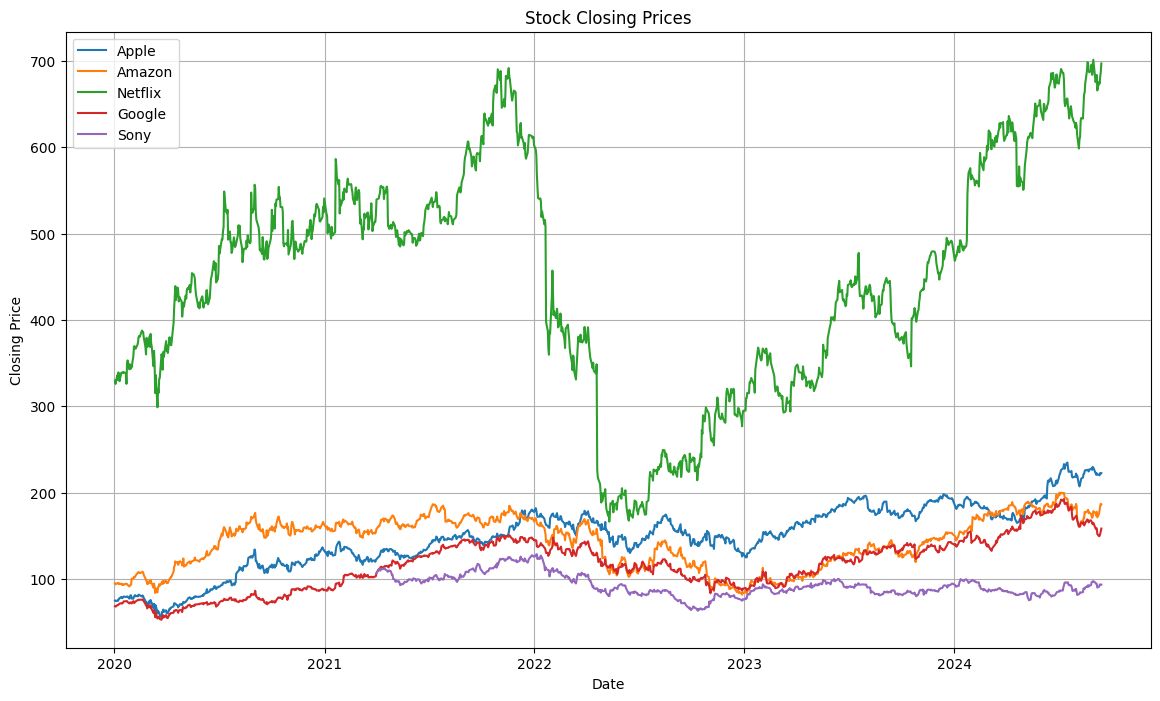

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Folder path where the JSON files are saved
folder_path = 'fetch'

# Tickers and their corresponding names
arrf = ["Apple", "Amazon", "Netflix", "Google"]

# Create a plot for each stock
plt.figure(figsize=(14, 8))

for name in arrf:
    # Load data from JSON file
    file_path = os.path.join(folder_path, f'{name}_stock.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Convert JSON data to DataFrame
    df = pd.DataFrame(data['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms')  # Convert timestamp to datetime
    df.set_index('t', inplace=True)
    
    # Plot the data
    plt.plot(df.index, df['c'], label=name)  # Plot closing prices

# Customize the plot
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.savefig('stock_prices_plot.png')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_34984\1928225693.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
C:\Users\user\AppData\Local\Temp\ipykernel_34984\1928225693.py:67: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
C:\Users\user\AppData\Local\Temp\ipykernel_34984\1928225693.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()


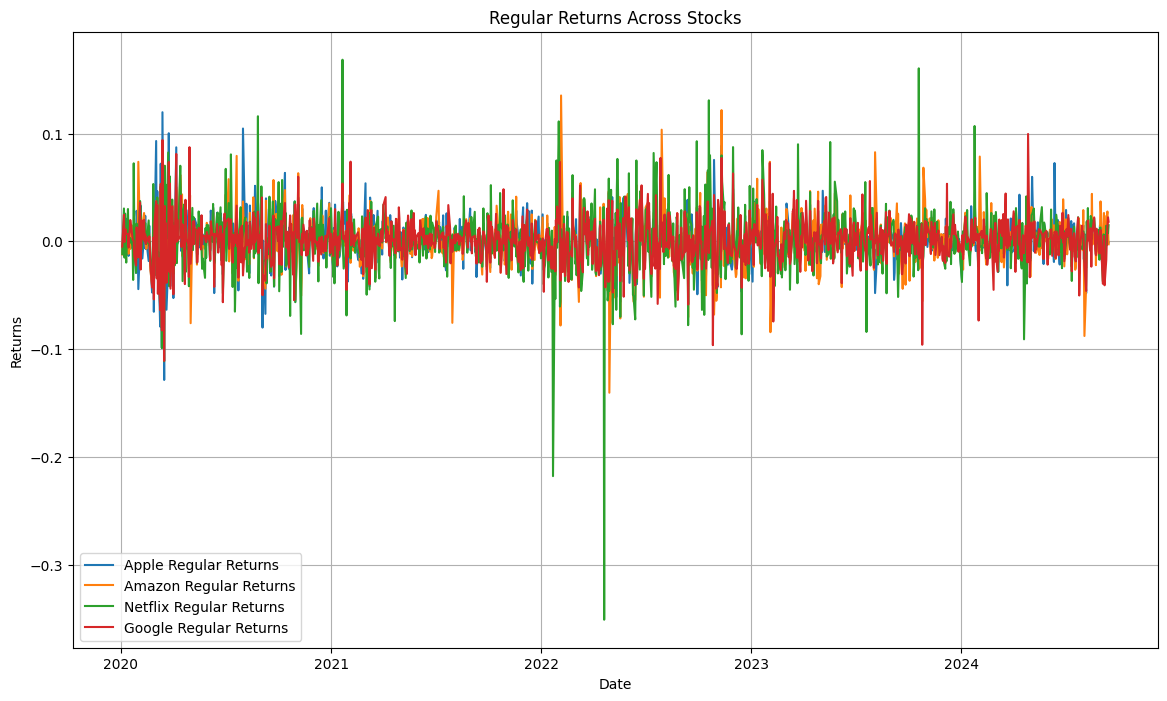

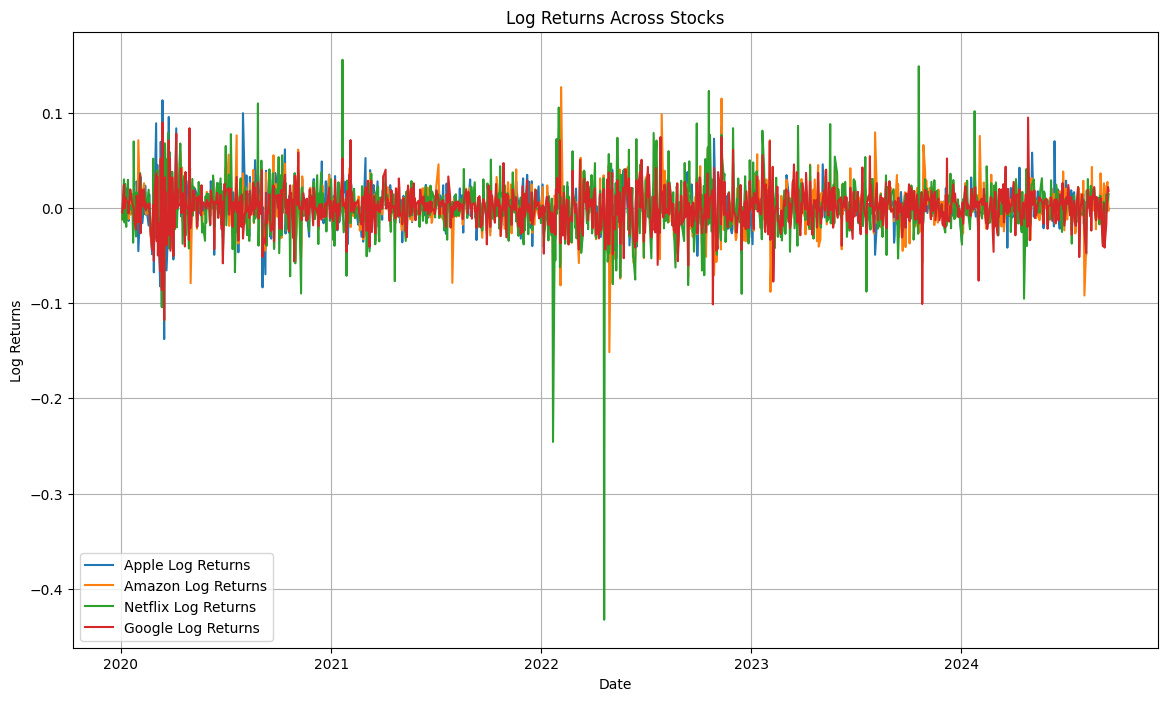

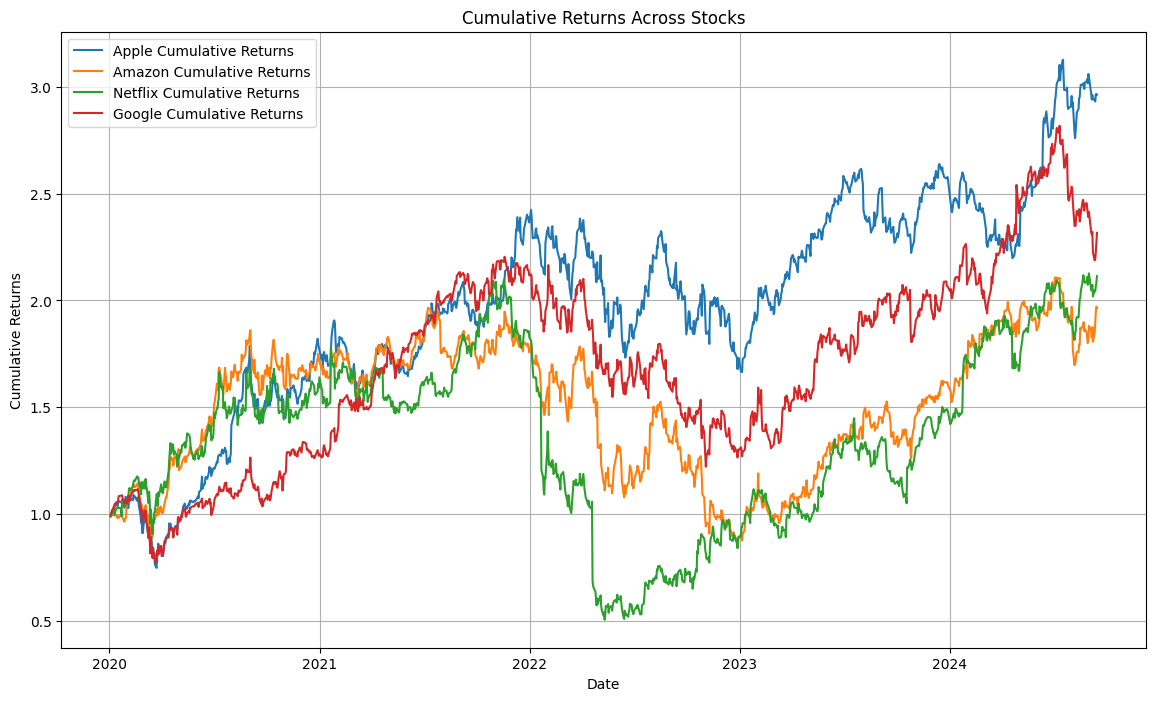

In [7]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Folder path where the JSON files are saved
folder_path = 'fetch'

# Tickers and their corresponding names
arrf = ["Apple", "Amazon", "Netflix", "Google"]

# Prepare plots for each type of return
fig1, ax1 = plt.subplots(figsize=(14, 8))
fig2, ax2 = plt.subplots(figsize=(14, 8))
fig3, ax3 = plt.subplots(figsize=(14, 8))

for name in arrf:
    # Load data from JSON file
    file_path = os.path.join(folder_path, f'{name}_stock.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Convert JSON data to DataFrame
    df = pd.DataFrame(data['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms')  # Convert timestamp to datetime
    df.set_index('t', inplace=True)
    df['close'] = df['c']
    
    # Calculate regular returns
    df['returns'] = df['close'].pct_change()
    # Calculate log returns
    df['log_returns'] = np.log(df['close'] / df['close'].shift(1))
    # Calculate cumulative returns
    df['cum_returns'] = (1 + df['returns']).cumprod()

    # Plot Regular Returns
    ax1.plot(df.index, df['returns'], label=f'{name} Regular Returns')
    ax1.set_title('Regular Returns Across Stocks')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Returns')
    ax1.legend()
    ax1.grid(True)

    # Plot Log Returns
    ax2.plot(df.index, df['log_returns'], label=f'{name} Log Returns')
    ax2.set_title('Log Returns Across Stocks')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Log Returns')
    ax2.legend()
    ax2.grid(True)

    # Plot Cumulative Returns
    ax3.plot(df.index, df['cum_returns'], label=f'{name} Cumulative Returns')
    ax3.set_title('Cumulative Returns Across Stocks')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Cumulative Returns')
    ax3.legend()
    ax3.grid(True)

# Save and show the Regular Returns plot
fig1.savefig('all_regular_returns.png')
fig1.show()

# Save and show the Log Returns plot
fig2.savefig('all_log_returns.png')
fig2.show()

# Save and show the Cumulative Returns plot
fig3.savefig('all_cumulative_returns.png')
fig3.show()


Analyzing Apple


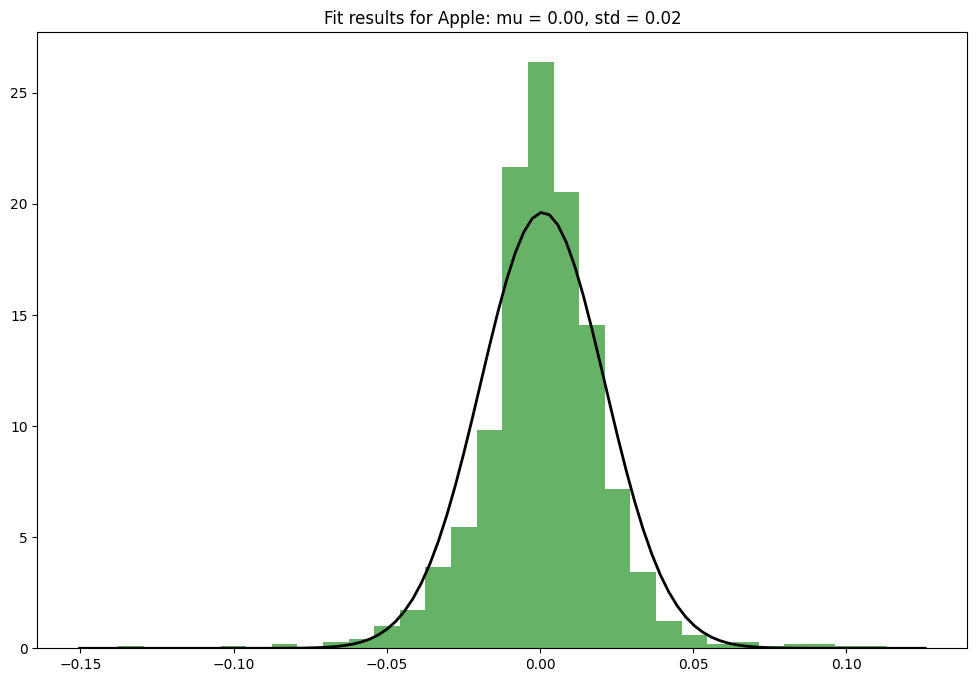

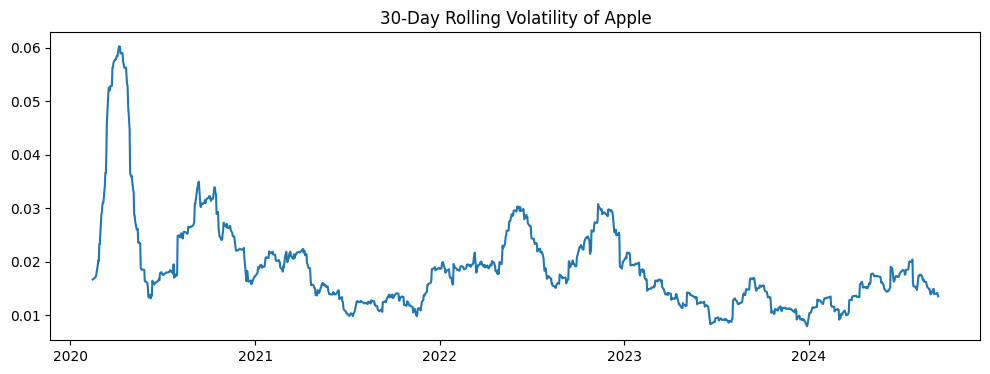

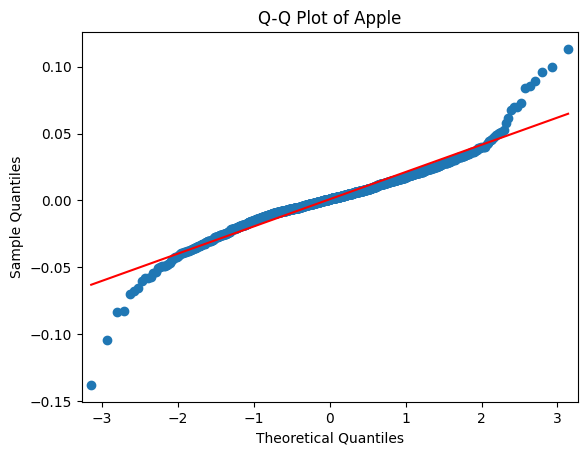

Skewness of Apple: -0.10286109911001538
Kurtosis of Apple: 8.183048852698196
Analyzing Amazon


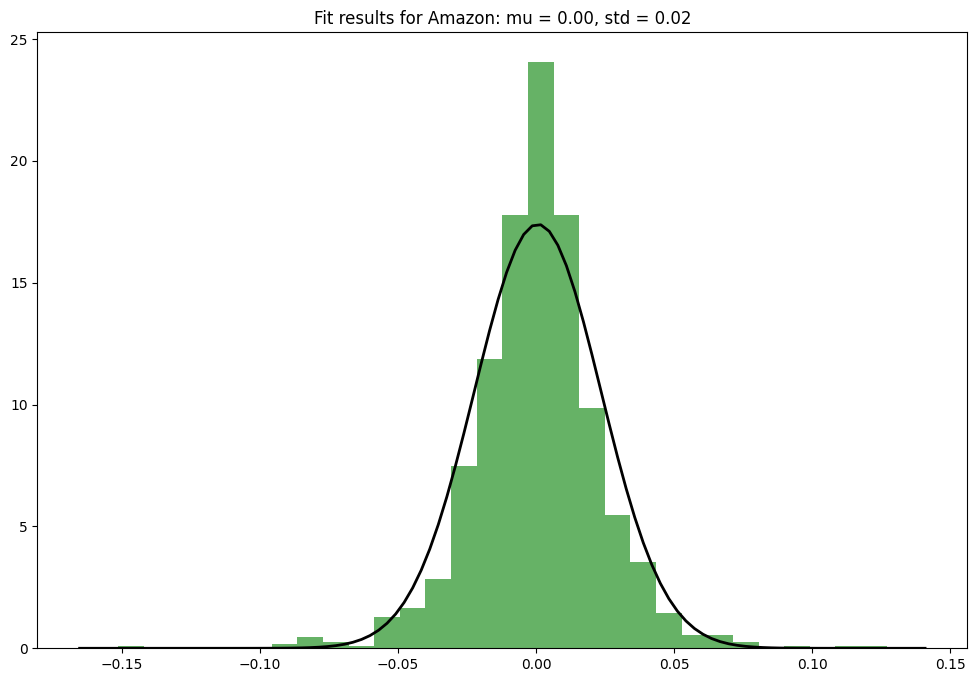

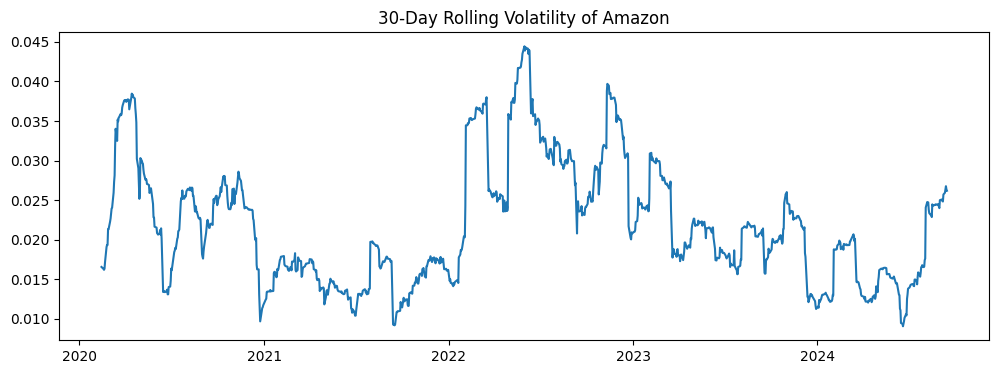

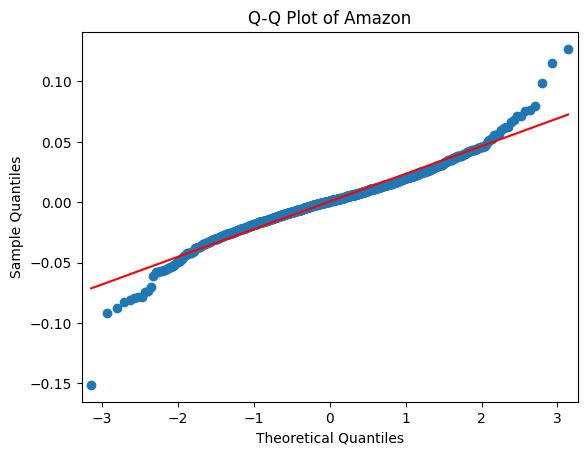

Skewness of Amazon: -0.13102510061116307
Kurtosis of Amazon: 7.054040784666823
Analyzing Netflix


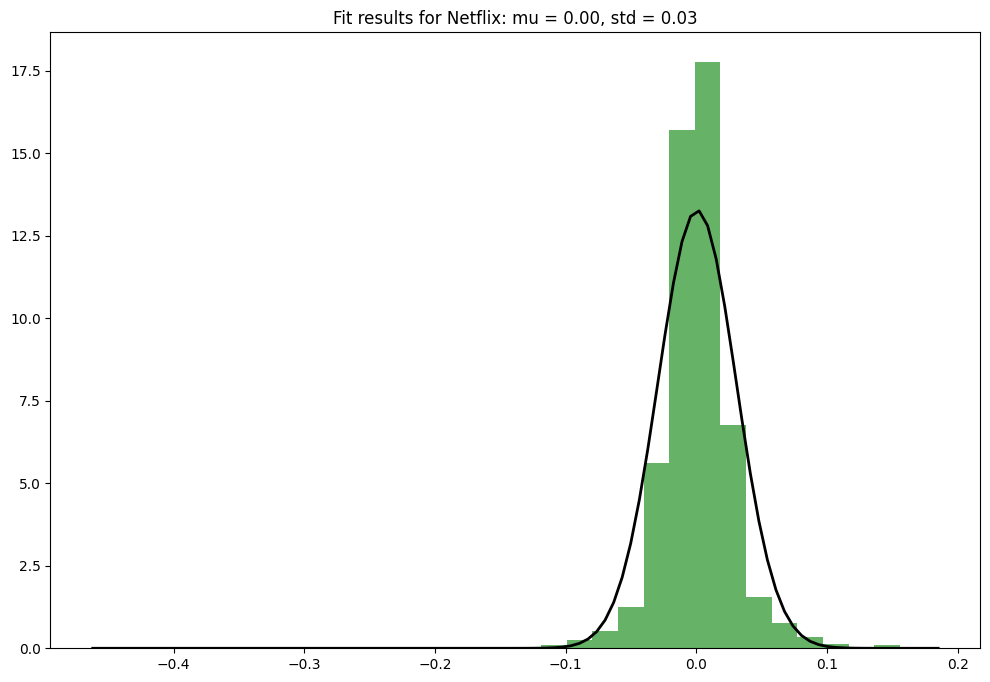

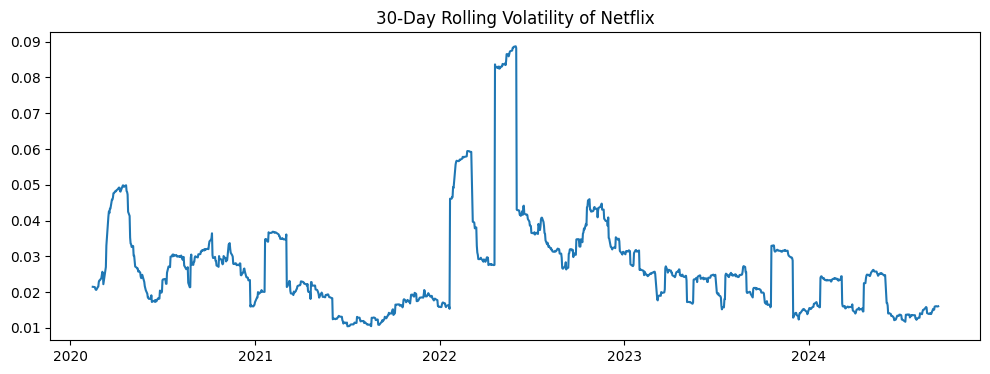

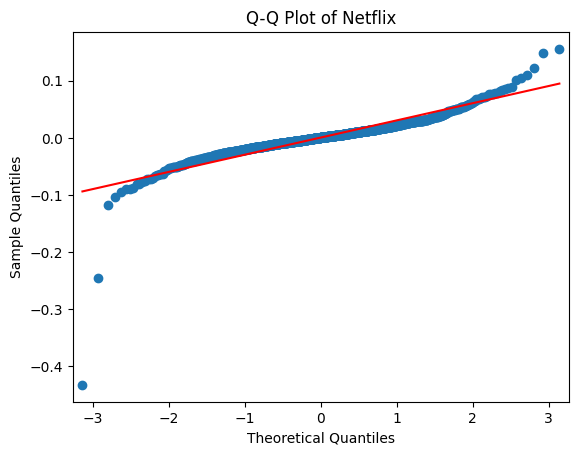

Skewness of Netflix: -2.667095732923382
Kurtosis of Netflix: 44.38624204544005
Analyzing Google


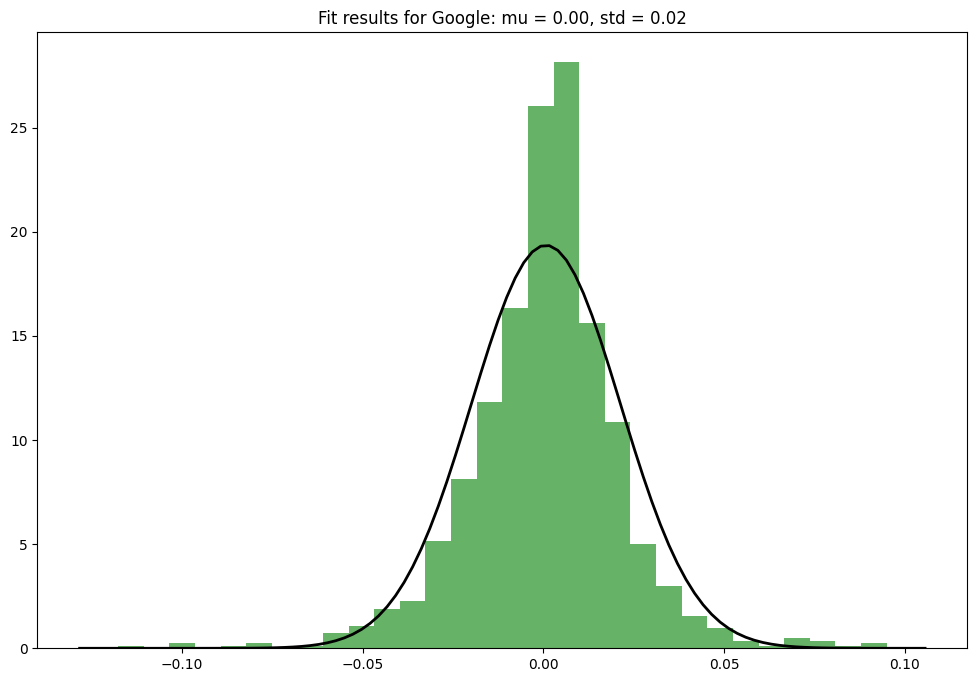

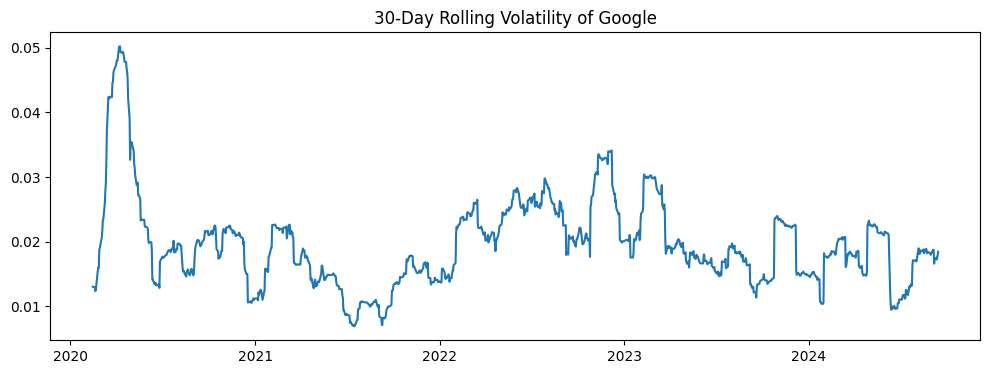

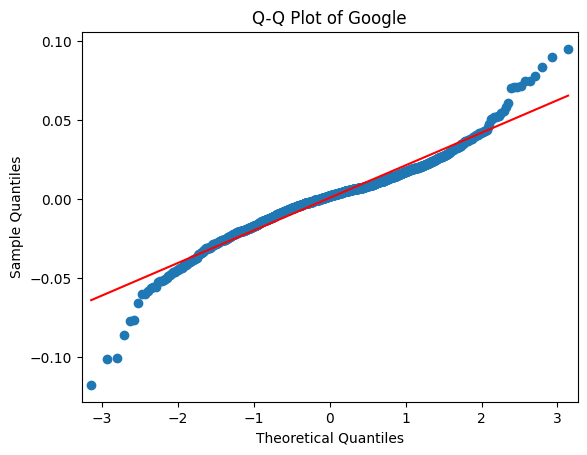

Skewness of Google: -0.24698647771212984
Kurtosis of Google: 6.692260157598551


In [12]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, kurtosis, skew
from statsmodels.graphics.gofplots import qqplot

# Folder path where the JSON files are saved
folder_path = 'fetch'
arrf = ["Apple", "Amazon", "Netflix", "Google"]

# Prepare data loading and initial preprocessing
data_frames = {}
for name in arrf:
    file_path = os.path.join(folder_path, f'{name}_stock.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms')
    df.set_index('t', inplace=True)
    df['log_returns'] = np.log(df['c'] / df['c'].shift(1))
    data_frames[name] = df.dropna()

def plot_data_analysis(df, stock_name):
    # Histogram and distribution fitting
    plt.figure(figsize=(12, 8))
    data = df['log_returns']
    mu, std = norm.fit(data)  # Fit a normal distribution
    plt.hist(data, bins=30, alpha=0.6, color='g', density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = f"Fit results for {stock_name}: mu = {mu:.2f}, std = {std:.2f}"
    plt.title(title)
    plt.show()

    # Rolling Volatility (using a 21-day window)
    df['rolling_vol'] = df['log_returns'].rolling(window=30).std()
    plt.figure(figsize=(12, 4))
    plt.plot(df['rolling_vol'])
    plt.title(f'30-Day Rolling Volatility of {stock_name}')
    plt.show()

    # Q-Q plot
    qqplot(df['log_returns'], line='s')
    plt.title(f'Q-Q Plot of {stock_name}')
    plt.show()

    # Skewness and Kurtosis
    skewness = skew(df['log_returns'])
    kurt = kurtosis(df['log_returns'], fisher=False)
    print(f'Skewness of {stock_name}: {skewness}')
    print(f'Kurtosis of {stock_name}: {kurt}')

# Analyzing each stock
for name, df in data_frames.items():
    print(f"Analyzing {name}")
    plot_data_analysis(df, name)


Analyzing Apple


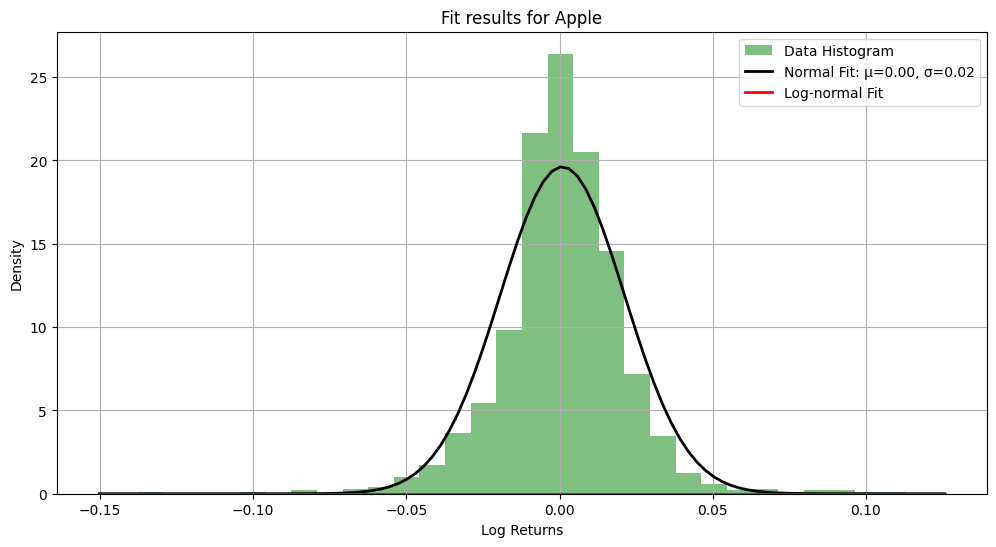

Analyzing Amazon


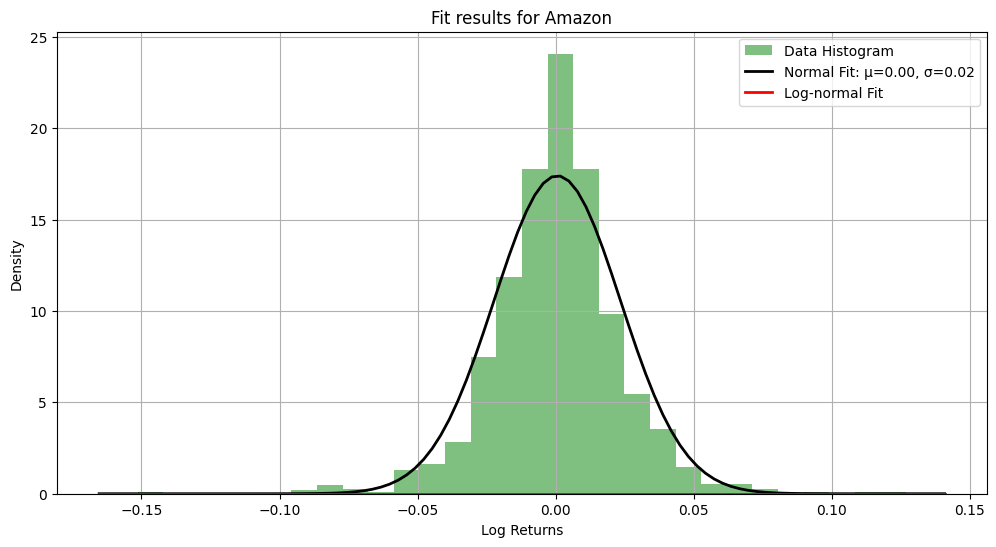

Analyzing Netflix


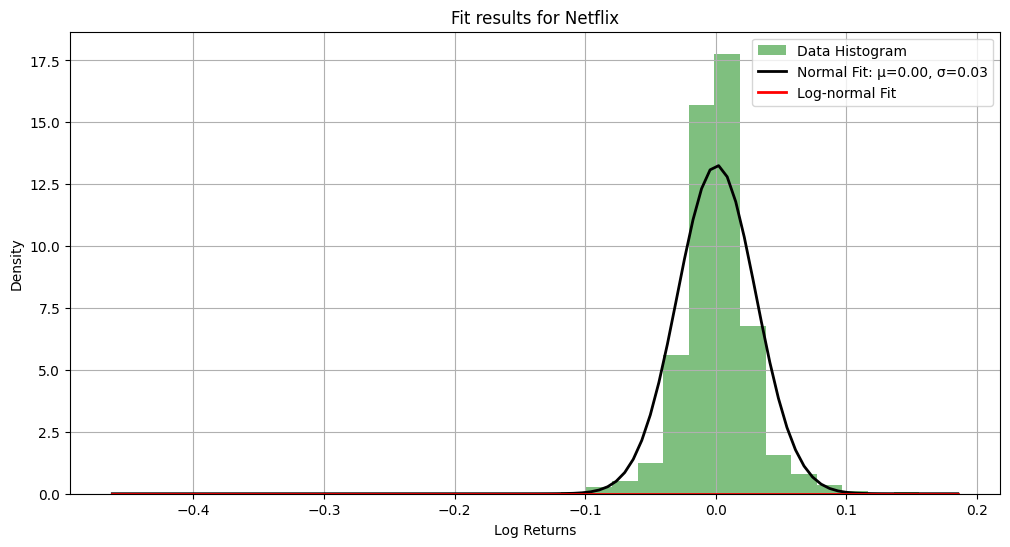

Analyzing Google


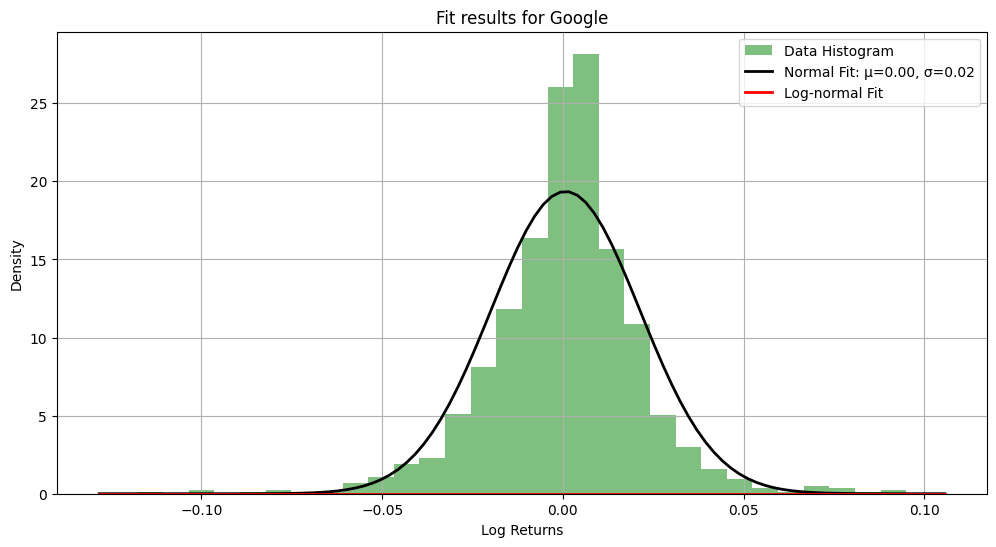

In [13]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Folder path where the JSON files are saved
folder_path = 'fetch'
arrf = ["Apple", "Amazon", "Netflix", "Google"]
# Prepare data loading and initial preprocessing
data_frames = {}
for name in arrf:
    file_path = os.path.join(folder_path, f'{name}_stock.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms')
    df.set_index('t', inplace=True)
    df['log_returns'] = np.log(df['c'] / df['c'].shift(1))
    data_frames[name] = df.dropna()

def plot_histogram_with_fits(df, stock_name):
    # Data for fitting
    data = df['log_returns'].dropna()

    # Normal distribution fitting
    mu, std = norm.fit(data)

    # Log-normal distribution fitting
    # Shift data to avoid negative or zero values
    shifted_data = data - data.min() + 1
    shape, loc, scale = lognorm.fit(shifted_data, floc=0)

    # Plotting
    plt.figure(figsize=(12, 6))
    count, bins, ignored = plt.hist(data, bins=30, alpha=0.5, color='g', density=True, label='Data Histogram')

    # Normal Distribution PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label=f'Normal Fit: μ={mu:.2f}, σ={std:.2f}')

    # Log-normal Distribution PDF
    x = np.linspace(xmin, xmax, 100)
    p = lognorm.pdf(x, shape, loc=loc, scale=scale)
    plt.plot(x, p, 'r', linewidth=2, label='Log-normal Fit')

    # Customize the plot
    plt.title(f'Fit results for {stock_name}')
    plt.xlabel('Log Returns')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Analyzing each stock
for name, df in data_frames.items():
    print(f"Analyzing {name}")
    plot_histogram_with_fits(df, name)


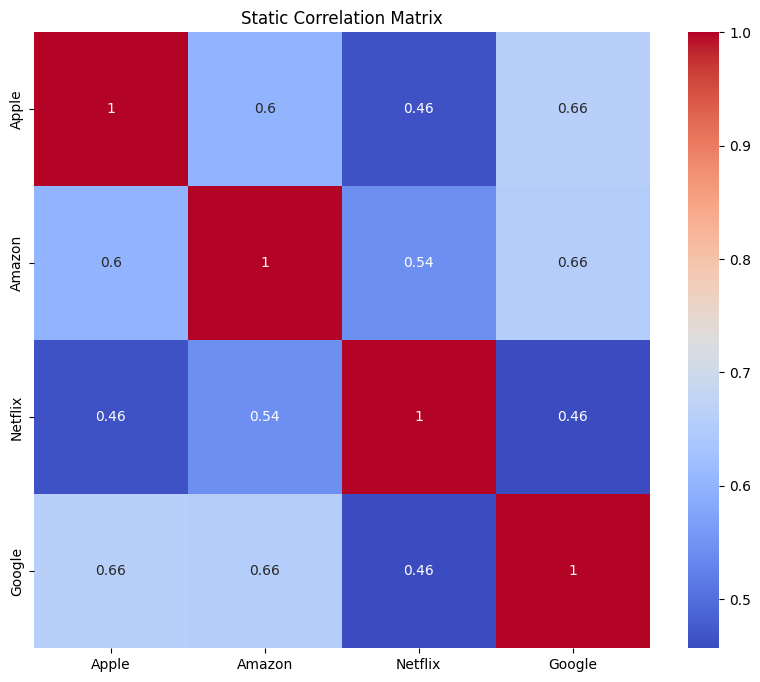

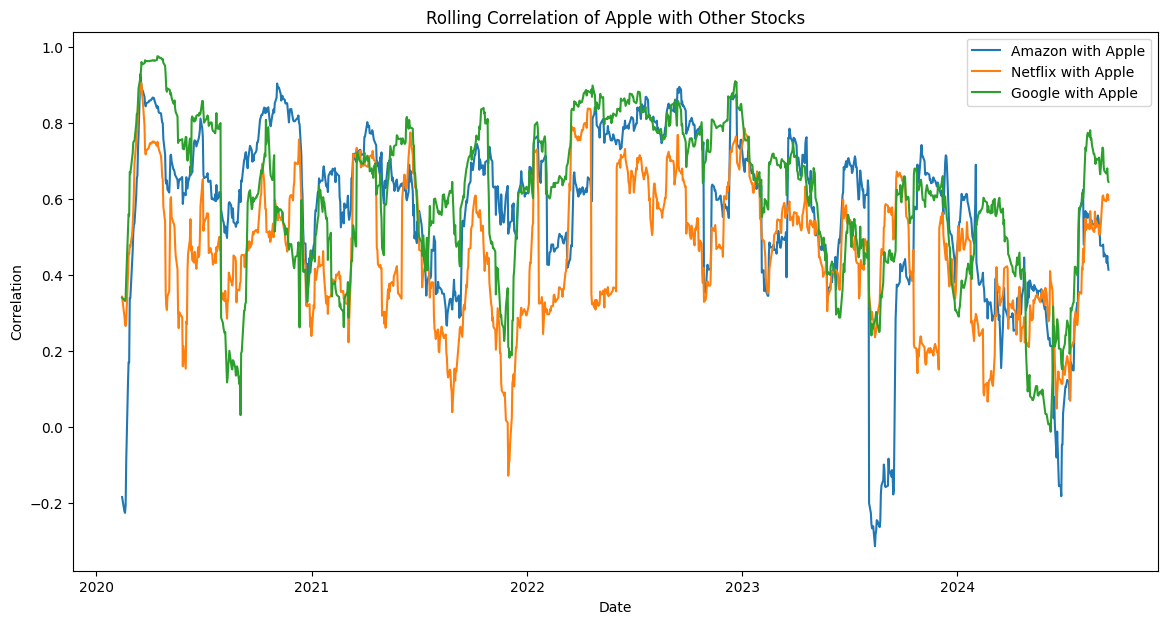

In [3]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Folder path where the JSON files are saved
folder_path = 'fetch'
arrf = ["Apple", "Amazon", "Netflix", "Google"]  # Add indexes if available, e.g., 'DJI', 'SET'

# Load and prepare the data
combined_df = pd.DataFrame()
for name in arrf:
    file_path = os.path.join(folder_path, f'{name}_stock.json')
    with open(file_path, 'r') as file:
        data = json.load(file)
    df = pd.DataFrame(data['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms')
    df.set_index('t', inplace=True)
    df[name] = df['c']  # Assume 'c' is the closing price
    if combined_df.empty:
        combined_df = df[[name]]
    else:
        combined_df = combined_df.join(df[name], how='outer')

# Calculate daily returns
returns_df = combined_df.pct_change().dropna()

# Plot the static correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Static Correlation Matrix')
plt.show()

# Choose a stock to compare with others for rolling correlation
base_stock = 'Apple'
rolling_window = 30  # Define the rolling window for correlation (e.g., 30 days)
rolling_corr = returns_df.rolling(window=rolling_window).corr(returns_df[base_stock])

# Plot rolling correlations
plt.figure(figsize=(14, 7))
for stock in arrf:
    if stock != base_stock:
        plt.plot(rolling_corr[stock], label=f'{stock} with {base_stock}')
plt.title(f'Rolling Correlation of {base_stock} with Other Stocks')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()


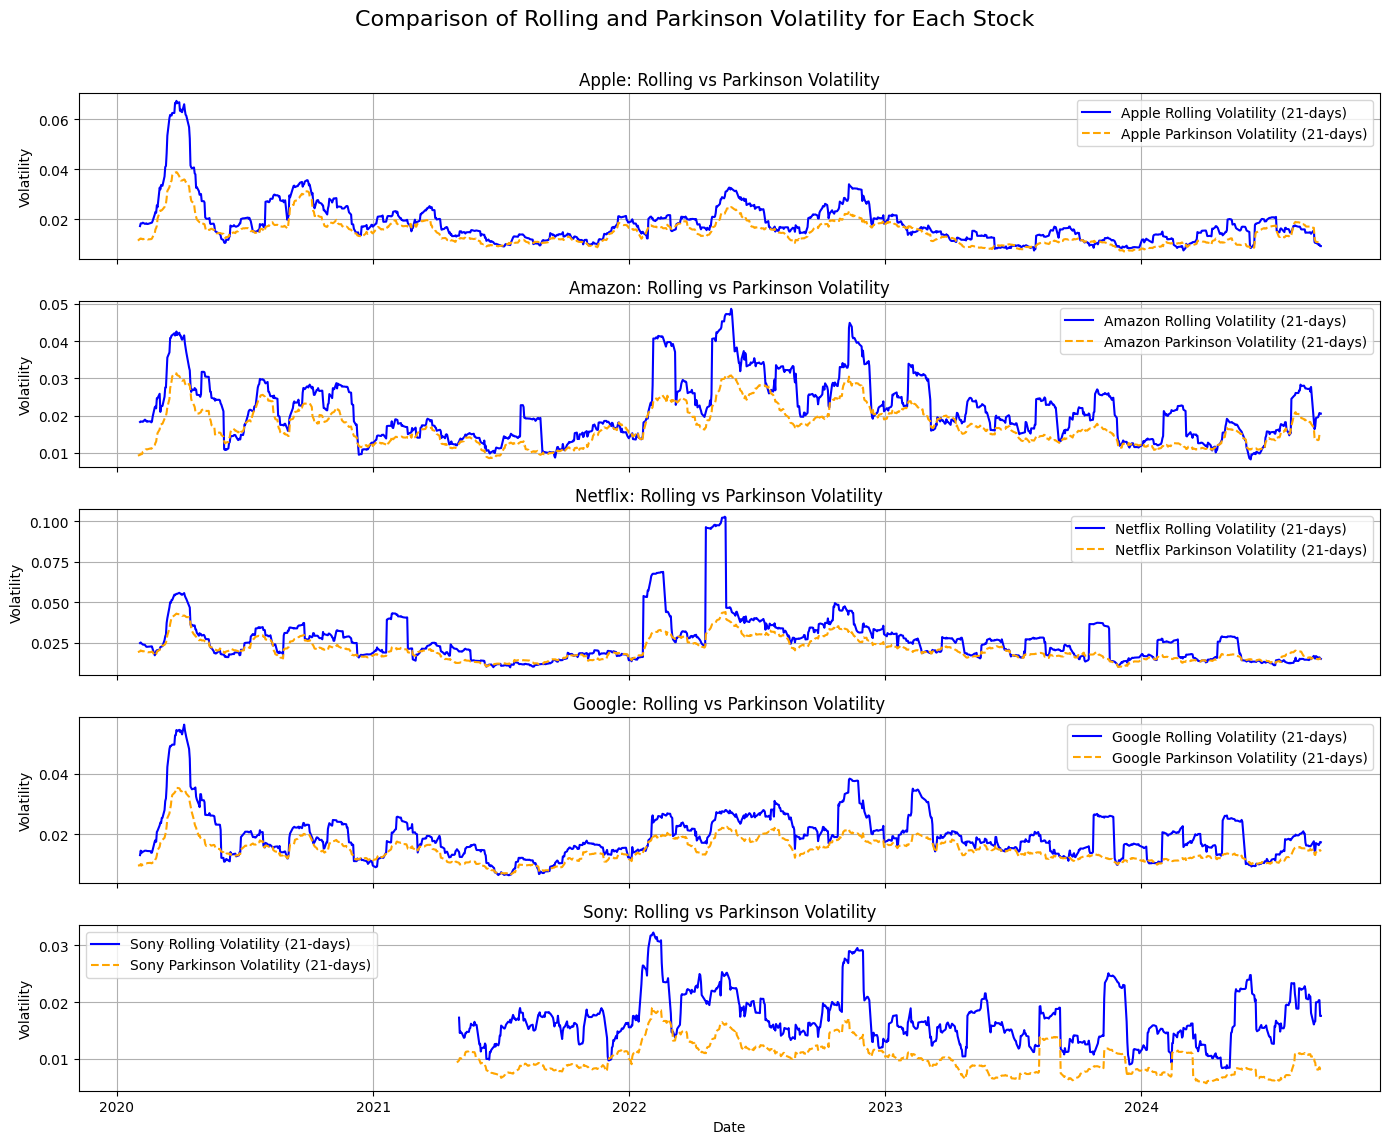

In [6]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Folder path where the JSON files are saved
folder_path = 'fetch'
arrf = ["Apple", "Amazon", "Netflix", "Google", "Sony"]

# Load and prepare the data
combined_df = pd.DataFrame()
for name in arrf:
    file_path = os.path.join(folder_path, f'{name}_stock.json')
    with open(file_path, 'r') as file:
        data = json.load(file)
    df = pd.DataFrame(data['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms')
    df.set_index('t', inplace=True)
    df[f'{name}_close'] = df['c']
    df[f'{name}_high'] = df['h']
    df[f'{name}_low'] = df['l']
    if combined_df.empty:
        combined_df = df[[f'{name}_close', f'{name}_high', f'{name}_low']]
    else:
        combined_df = combined_df.join(df[[f'{name}_close', f'{name}_high', f'{name}_low']], how='outer')

# Calculate log returns for rolling volatility
for name in arrf:
    combined_df[f'{name}_log_return'] = np.log(combined_df[f'{name}_close'] / combined_df[f'{name}_close'].shift(1))

# Rolling window
rolling_window = 21

# Create subplots to separate the comparisons of each stock
fig, axs = plt.subplots(len(arrf), 1, figsize=(14, 12), sharex=True)

# Plot both rolling and Range-Based volatilities for each stock in separate subplots
for i, name in enumerate(arrf):
    # Rolling standard deviation of log returns (rolling volatility)
    rolling_vol = combined_df[f'{name}_log_return'].rolling(window=rolling_window).std()
    
    # Range-Based's volatility
    highs = combined_df[f'{name}_high']
    lows = combined_df[f'{name}_low']
    Range-Based_vol = np.sqrt((1 / (4 * np.log(2))) * (np.log(highs / lows) ** 2).rolling(window=rolling_window).mean())
    
    # Plot rolling volatility in solid line
    axs[i].plot(rolling_vol, label=f'{name} Rolling Volatility ({rolling_window}-days)', color='blue')
    
    # Plot Range-Based volatility in dashed line with different color
    axs[i].plot(Range-Based_vol, label=f'{name} Range-Based Volatility ({rolling_window}-days)', linestyle='--', color='orange')
    
    # Customize subplot
    axs[i].set_title(f'{name}: Rolling vs Range-Based Volatility')
    axs[i].set_ylabel('Volatility')
    axs[i].grid(True)
    axs[i].legend()

# Set common labels
fig.suptitle('Comparison of Rolling and Range-Based Volatility for Each Stock', fontsize=16)
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Show the plot
plt.show()
